# Flushing times after Hurricane Harvey

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os

In [2]:
# read in buoy info
bys = pd.read_csv('../tabswebsite/includes/buoys.csv', index_col=0).to_dict('index')

## Read in TWDB time series data

From this we get a dictionary, `df`, which contains dataframes for each station.

In [3]:
filename = 'twdb/data.csv'
if not os.path.exists(filename):
    names = ['BOLI', 'FISH', 'MIDG', 'OLDR', 'TRIN']
    Files = ['_seawater_salinity', '_water_depth_nonvented',
             '_water_dissolved_oxygen_concentration',
             '_water_dissolved_oxygen_percent_saturation', '_water_ph',
             '_water_temperature', 'OLDR_water_turbidity']
    filenames = ['salinity [psu]', 'depth [m]', 'temp [C]']
    df = {}
    for name  in names:
        dfs = []
        for File, filename  in zip(Files, filenames):
            try:
                dft = pd.read_csv('twdb/' + name + File + '.csv', index_col=0,
                                 parse_dates=True, comment='#', header=0, names=['dates [local]', filename])
            except:
                dft = pd.DataFrame()
            # dft.rename(columns={'value': name}, inplace=True)
            # dft = dft.resample('1H', base=0).mean()
            dfs.append(dft)
        df[name] = pd.concat(dfs, axis=1)
    # add on extra BOLI times
    dft = pd.read_csv('twdb/Boli.csv', index_col=0, parse_dates=True)
    dft.drop(['Datetime_(UTC).1', 'water_conductivity_mS/cm',
              'instrument_battery_voltage', 'water_specific_conductivity_mS/cm'], axis=1, inplace=True)
    dft.rename(columns={'water_temp_C': 'temp',
                        'water_depth_m_nonvented': 'depth',
                        'water_salinity_PSU': 'salinity'}, inplace=True)
    df['BOLI'] = df['BOLI'].append(dft)
    # don't use data after Sept 21st since looks weird
    for name in names:
        df[name] = df[name][:'2017-09-20']
    df.to_pickle(filename)
# else:
#     df = pd.read_csv(filename, index_col=0, parse_dates=True)

AttributeError: 'dict' object has no attribute 'to_pickle'

In [4]:
ll = {'BOLI': ([-94.783, 29.342]), 'MIDG': ([-94.875, 29.508]), 'FISH': ([-94.854, 29.670]), 
     'TRIN': ([-94.746, 29.661]), 'OLDR': ([-94.783, 29.833])}

## Dataframe of salinity only

In [5]:
dfts = [df[name]['salinity'].resample('1H', base=0).mean().rename(name) for name in names]
salt = pd.concat(dfts, axis=1)

saltlog = np.log(salt)


# # also depth
# dfts = [df[name]['depth'].resample('1H', base=0).mean().rename(name) for name in names]
# depth = pd.concat(dfts, axis=1)


/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


# Salinity data

NonGuiException: 

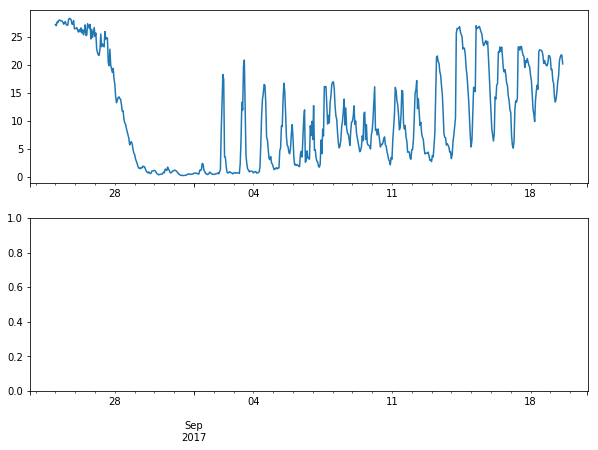

In [30]:
fig, ax = plt.subplots(2,1, figsize=(10,7), sharex=True)

salt['2017-08-25':][names].plot(ax=ax[0])
ax[0].set_title('Linear')

saltlog['2017-08-25':][names].plot(ax=ax[1])
ax[1].set_title('Log')


# Map

In [53]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
# rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

<IPython.core.display.Javascript object>


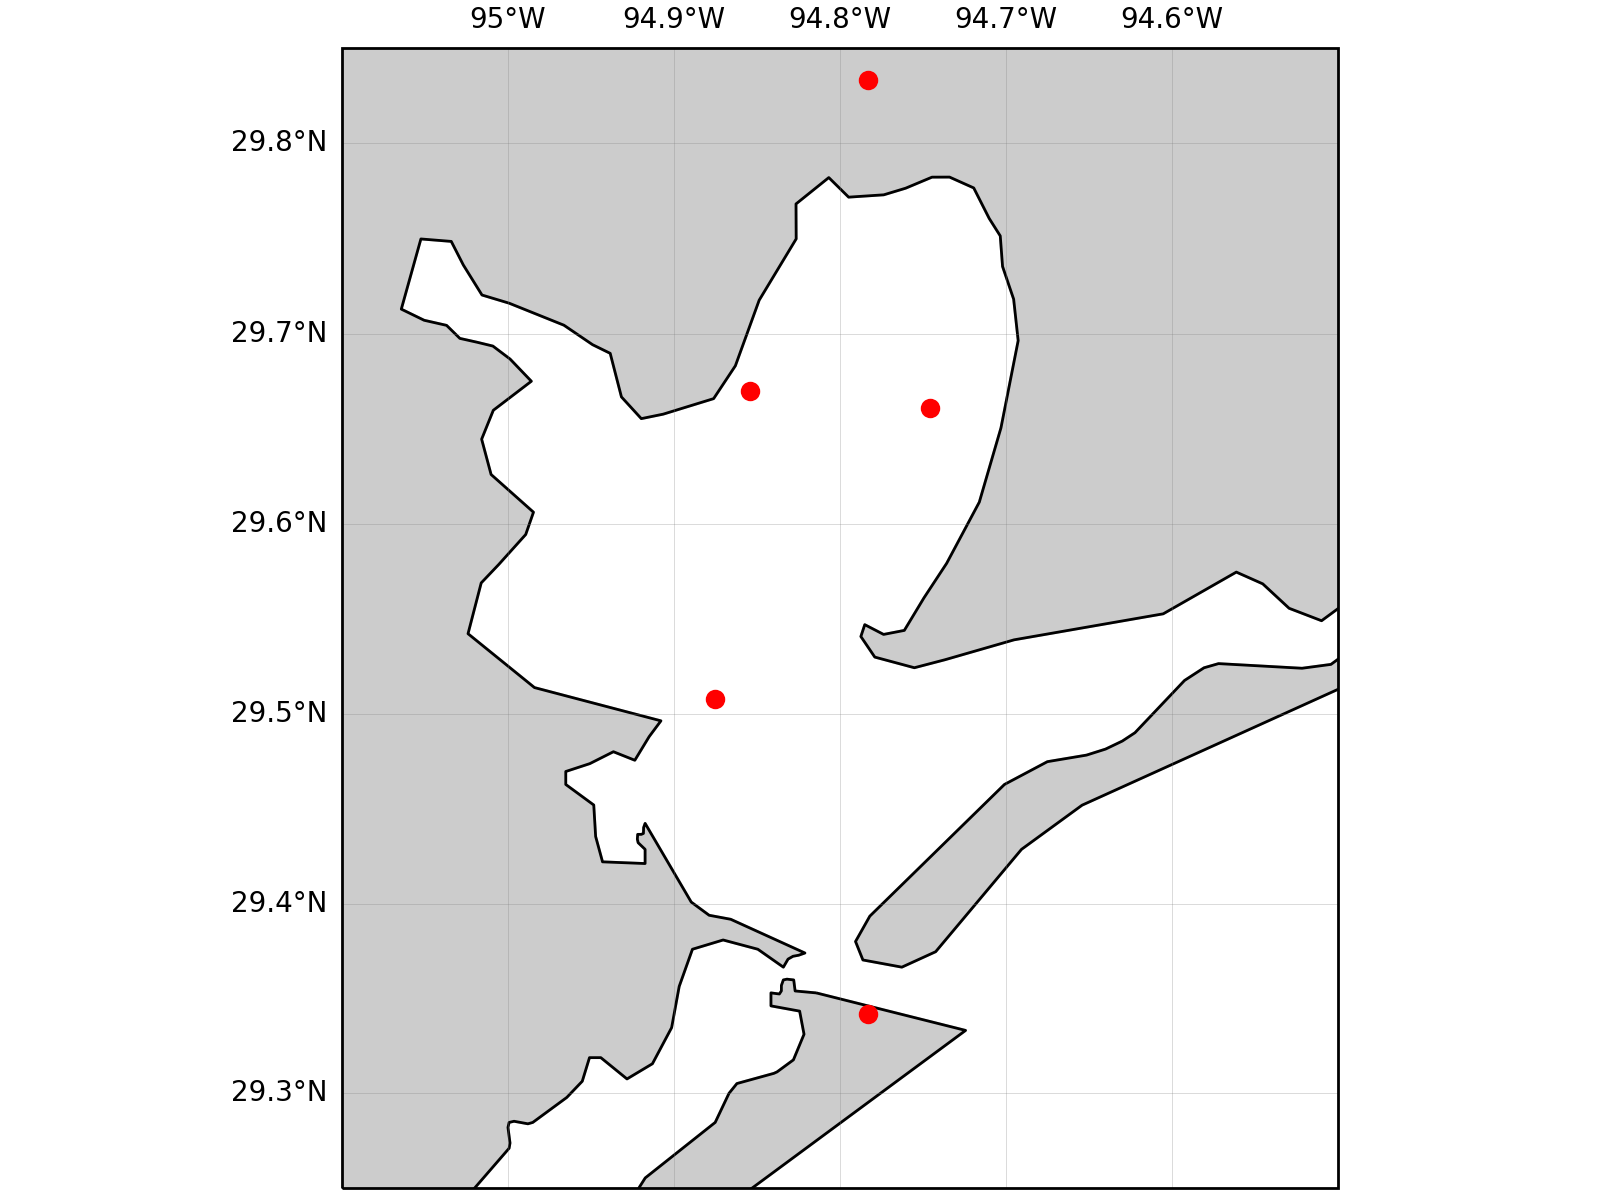

In [78]:
fig = plt.figure(figsize=(8, 6))# (9.4, 7.7))
ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-95.1, -94.5, 29.25, 29.85], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
# ax.add_feature(rivers, edgecolor='k')

for name in names:
    ax.plot(*ll[name], 'ro', transform=pc)

<IPython.core.display.Javascript object>


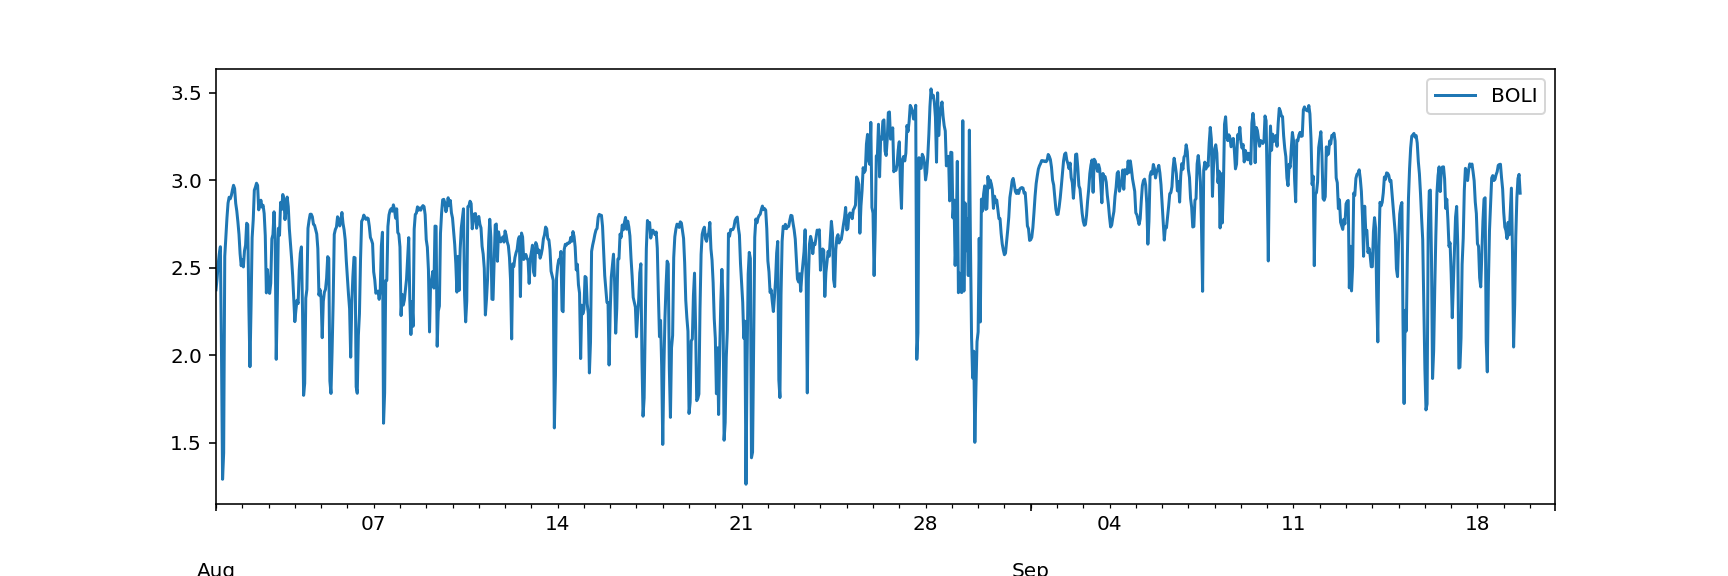

In [84]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
# for name in names:
#     print(name)
depth['2017-08-01':].plot(y='BOLI', ax=ax)

In [82]:
df['TRIN']['depth']['2017-08-01':]

dates [local]
2017-08-01 00:19:00   NaN
2017-08-01 01:20:00   NaN
2017-08-01 02:21:00   NaN
2017-08-01 03:22:00   NaN
2017-08-01 04:23:00   NaN
2017-08-01 05:00:00   NaN
2017-08-01 06:01:00   NaN
2017-08-01 07:02:00   NaN
2017-08-01 08:03:00   NaN
2017-08-01 09:04:00   NaN
2017-08-01 10:05:00   NaN
2017-08-01 11:06:00   NaN
2017-08-01 12:07:00   NaN
2017-08-01 13:08:00   NaN
2017-08-01 14:09:00   NaN
2017-08-01 15:10:00   NaN
2017-08-01 16:11:00   NaN
2017-08-01 17:12:00   NaN
2017-08-01 18:13:00   NaN
2017-08-01 19:14:00   NaN
2017-08-01 20:15:00   NaN
2017-08-01 21:16:00   NaN
2017-08-01 22:17:00   NaN
2017-08-01 23:18:00   NaN
2017-08-02 00:19:00   NaN
2017-08-02 01:20:00   NaN
2017-08-02 02:21:00   NaN
2017-08-02 03:22:00   NaN
2017-08-02 04:23:00   NaN
2017-08-02 05:00:00   NaN
                       ..
2017-09-19 18:13:00   NaN
2017-09-19 19:14:00   NaN
2017-09-19 20:15:00   NaN
2017-09-19 21:16:00   NaN
2017-09-19 22:17:00   NaN
2017-09-19 23:18:00   NaN
2017-09-20 00:19:00   Na

# ALSO LOOK AT RAIN GAUGES and other met data for the time period

use rain gauges to interpolate between daily radar data

(can be from TABS site?)

ALSO TOPOGRAPHY?

In [33]:
import xarray as xr
d = xr.open_dataset('precip/NWS/nws_precip_1day_20170826_netcdf/nws_precip_1day_20170826_conus.nc')

In [103]:
d

<xarray.Dataset>
Dimensions:                (polar_stereographic: 0, x: 1121, y: 881)
Coordinates:
  * polar_stereographic    (polar_stereographic) int32 
  * x                      (x) float64 -1.903e+06 -1.898e+06 -1.893e+06 ...
  * y                      (y) float64 -3.426e+06 -3.431e+06 -3.436e+06 ...
Data variables:
    observation            (y, x) float64 nan nan nan nan nan nan nan nan ...
    normal                 (y, x) float64 nan nan nan nan nan nan nan nan ...
    departure_from_normal  (y, x) float64 nan nan nan nan nan nan nan nan ...
    percent_of_normal      (y, x) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    creation_time:  20170905T124906
    Conventions:    CF-1.6
    wkt:            PROJCS[  "unnamed",  GEOGCS[    "Coordinate System import...
    proj4:          +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-105 +k=90 +x_0=0...

In [93]:
from importlib import reload

In [9]:
# reload( p2c)
import p2c
import pyproj
proj = p2c.proj_to_cartopy(pyproj.Proj(d.proj4))

In [27]:
rain = d.observation
rain = np.ma.masked_where(np.isnan(d.observation), d.observation)

In [28]:
rain.max()

7.425196647644043

<IPython.core.display.Javascript object>


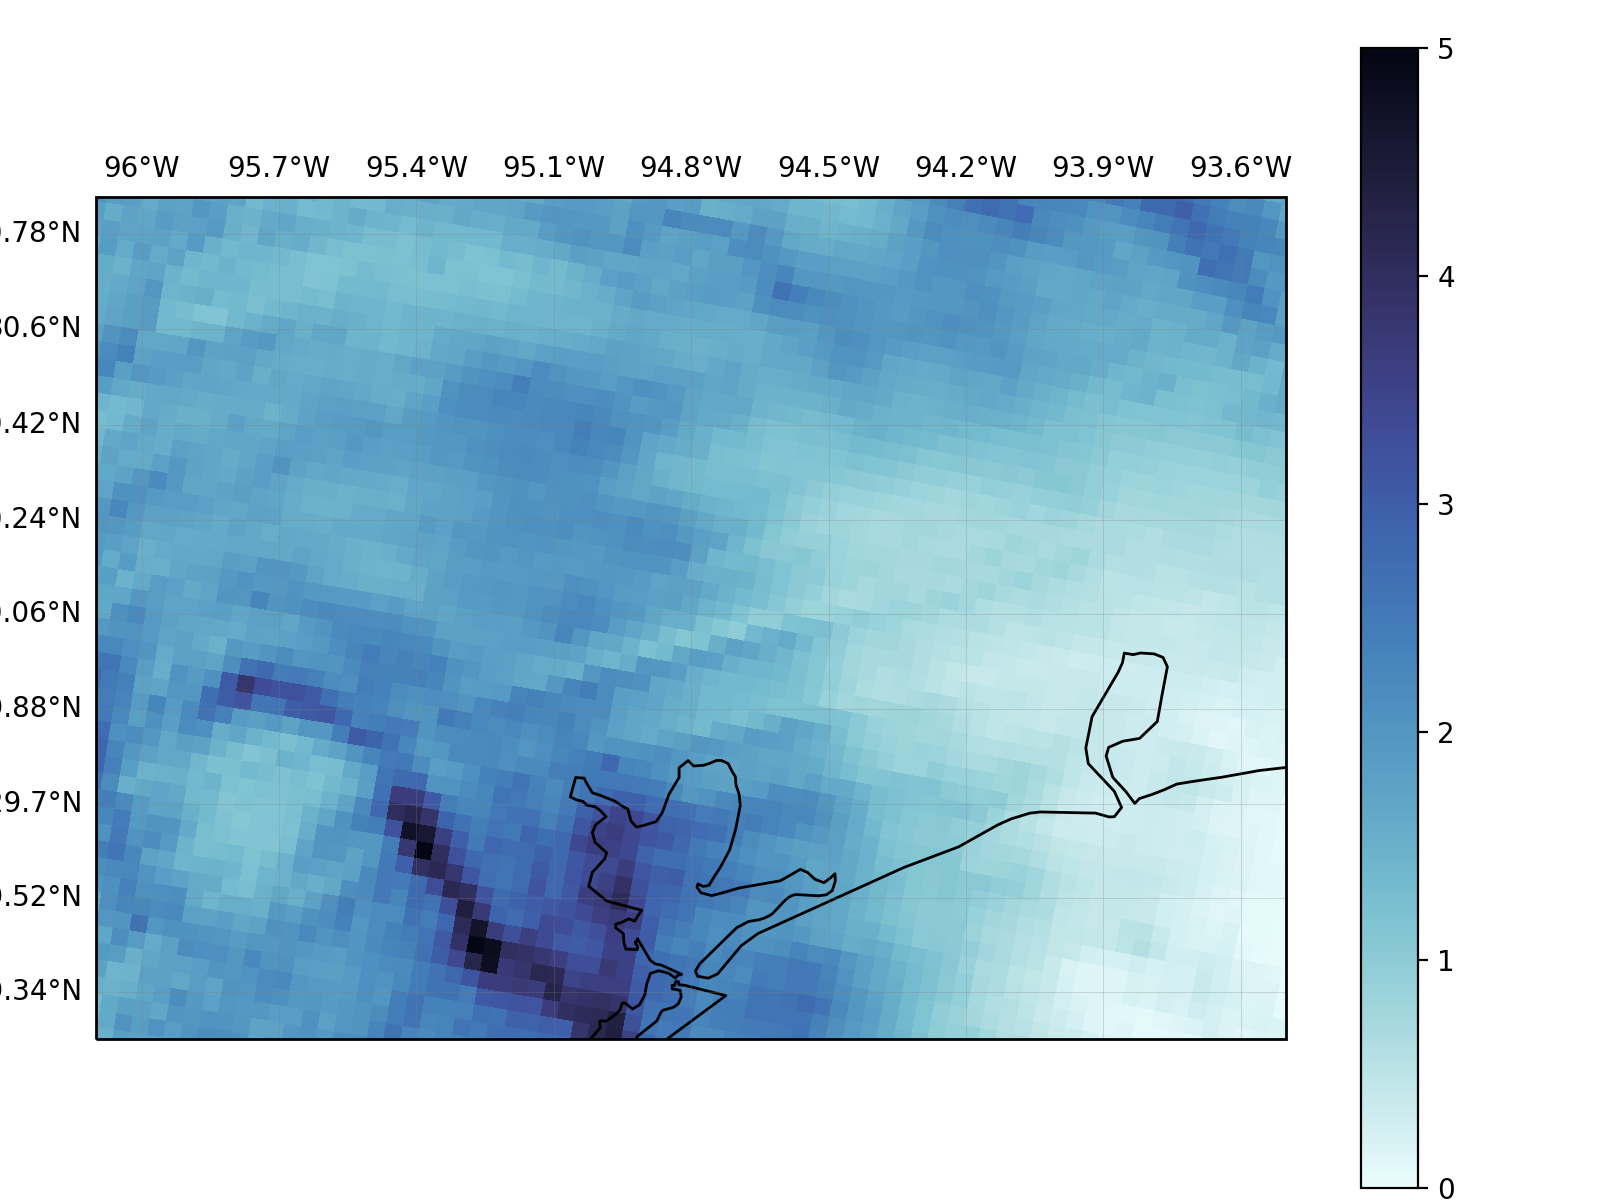

In [39]:
fig = plt.figure(figsize=(8, 6))# (9.4, 7.7))
ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-96.1, -93.5, 29.25, 30.85], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
# ax.add_feature(land_10m, facecolor='0.8')

# add precip data

mappable = ax.pcolormesh(d.x, d.y, rain, vmin=0, vmax=5, transform=proj, cmap=cmo.ice_r)
fig.colorbar(mappable)

ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'


# add topo data

In [110]:
plt.pcolormesh(rain)

In [1]:
plt.contourf(d.observation)

NameError: name 'plt' is not defined

# Surrounding data



In [55]:
eagle = pd.read_table('buoys/-tmp-8771013_1imzRs', parse_dates=True, index_col=0, na_values=[-999.0])

In [56]:
eagle['2017-08-20 19']

,Water Level [m],Speed [m/s],Dir from [deg T],Gust [m/s],AirT [deg C],AtmPr [MB],RelH [%],East [m/s],North [m/s],WaterT [deg C],Conductivity [mS/cm],Salinity
Dates [CST],,,,,,,,,,,,
2017-08-20 19:00:00,0.27,5.2,135.0,7.3,31.1,1015.0,NaN,-3.68,3.68,33.3,27.97,14.49
2017-08-20 19:06:00,0.27,5.5,136.0,7.2,30.9,1015.1,NaN,-3.82,3.96,33.3,27.97,14.49
2017-08-20 19:12:00,0.24,5.6,143.0,7.5,30.9,1015.1,NaN,-3.37,4.47,33.2,27.95,14.50
2017-08-20 19:18:00,0.25,5.4,137.0,7.3,30.9,1015.1,NaN,-3.68,3.95,33.2,27.94,14.50
2017-08-20 19:24:00,0.24,5.3,144.0,6.6,30.8,1015.1,NaN,-3.12,4.29,33.2,27.91,14.48
2017-08-20 19:30:00,0.23,5.8,153.0,7.0,30.7,1015.2,NaN,-2.63,5.17,33.2,27.88,14.46
2017-08-20 19:36:00,0.22,6.1,146.0,6.9,30.7,1015.2,NaN,-3.41,5.06,33.1,27.85,14.47
2017-08-20 19:42:00,0.21,6.0,151.0,6.7,30.8,1015.2,NaN,-2.91,5.25,33.1,27.81,14.45
2017-08-20 19:48:00,0.22,6.1,155.0,7.2,30.7,1015.3,NaN,-2.58,5.53,33.0,27.78,14.46


<IPython.core.display.Javascript object>


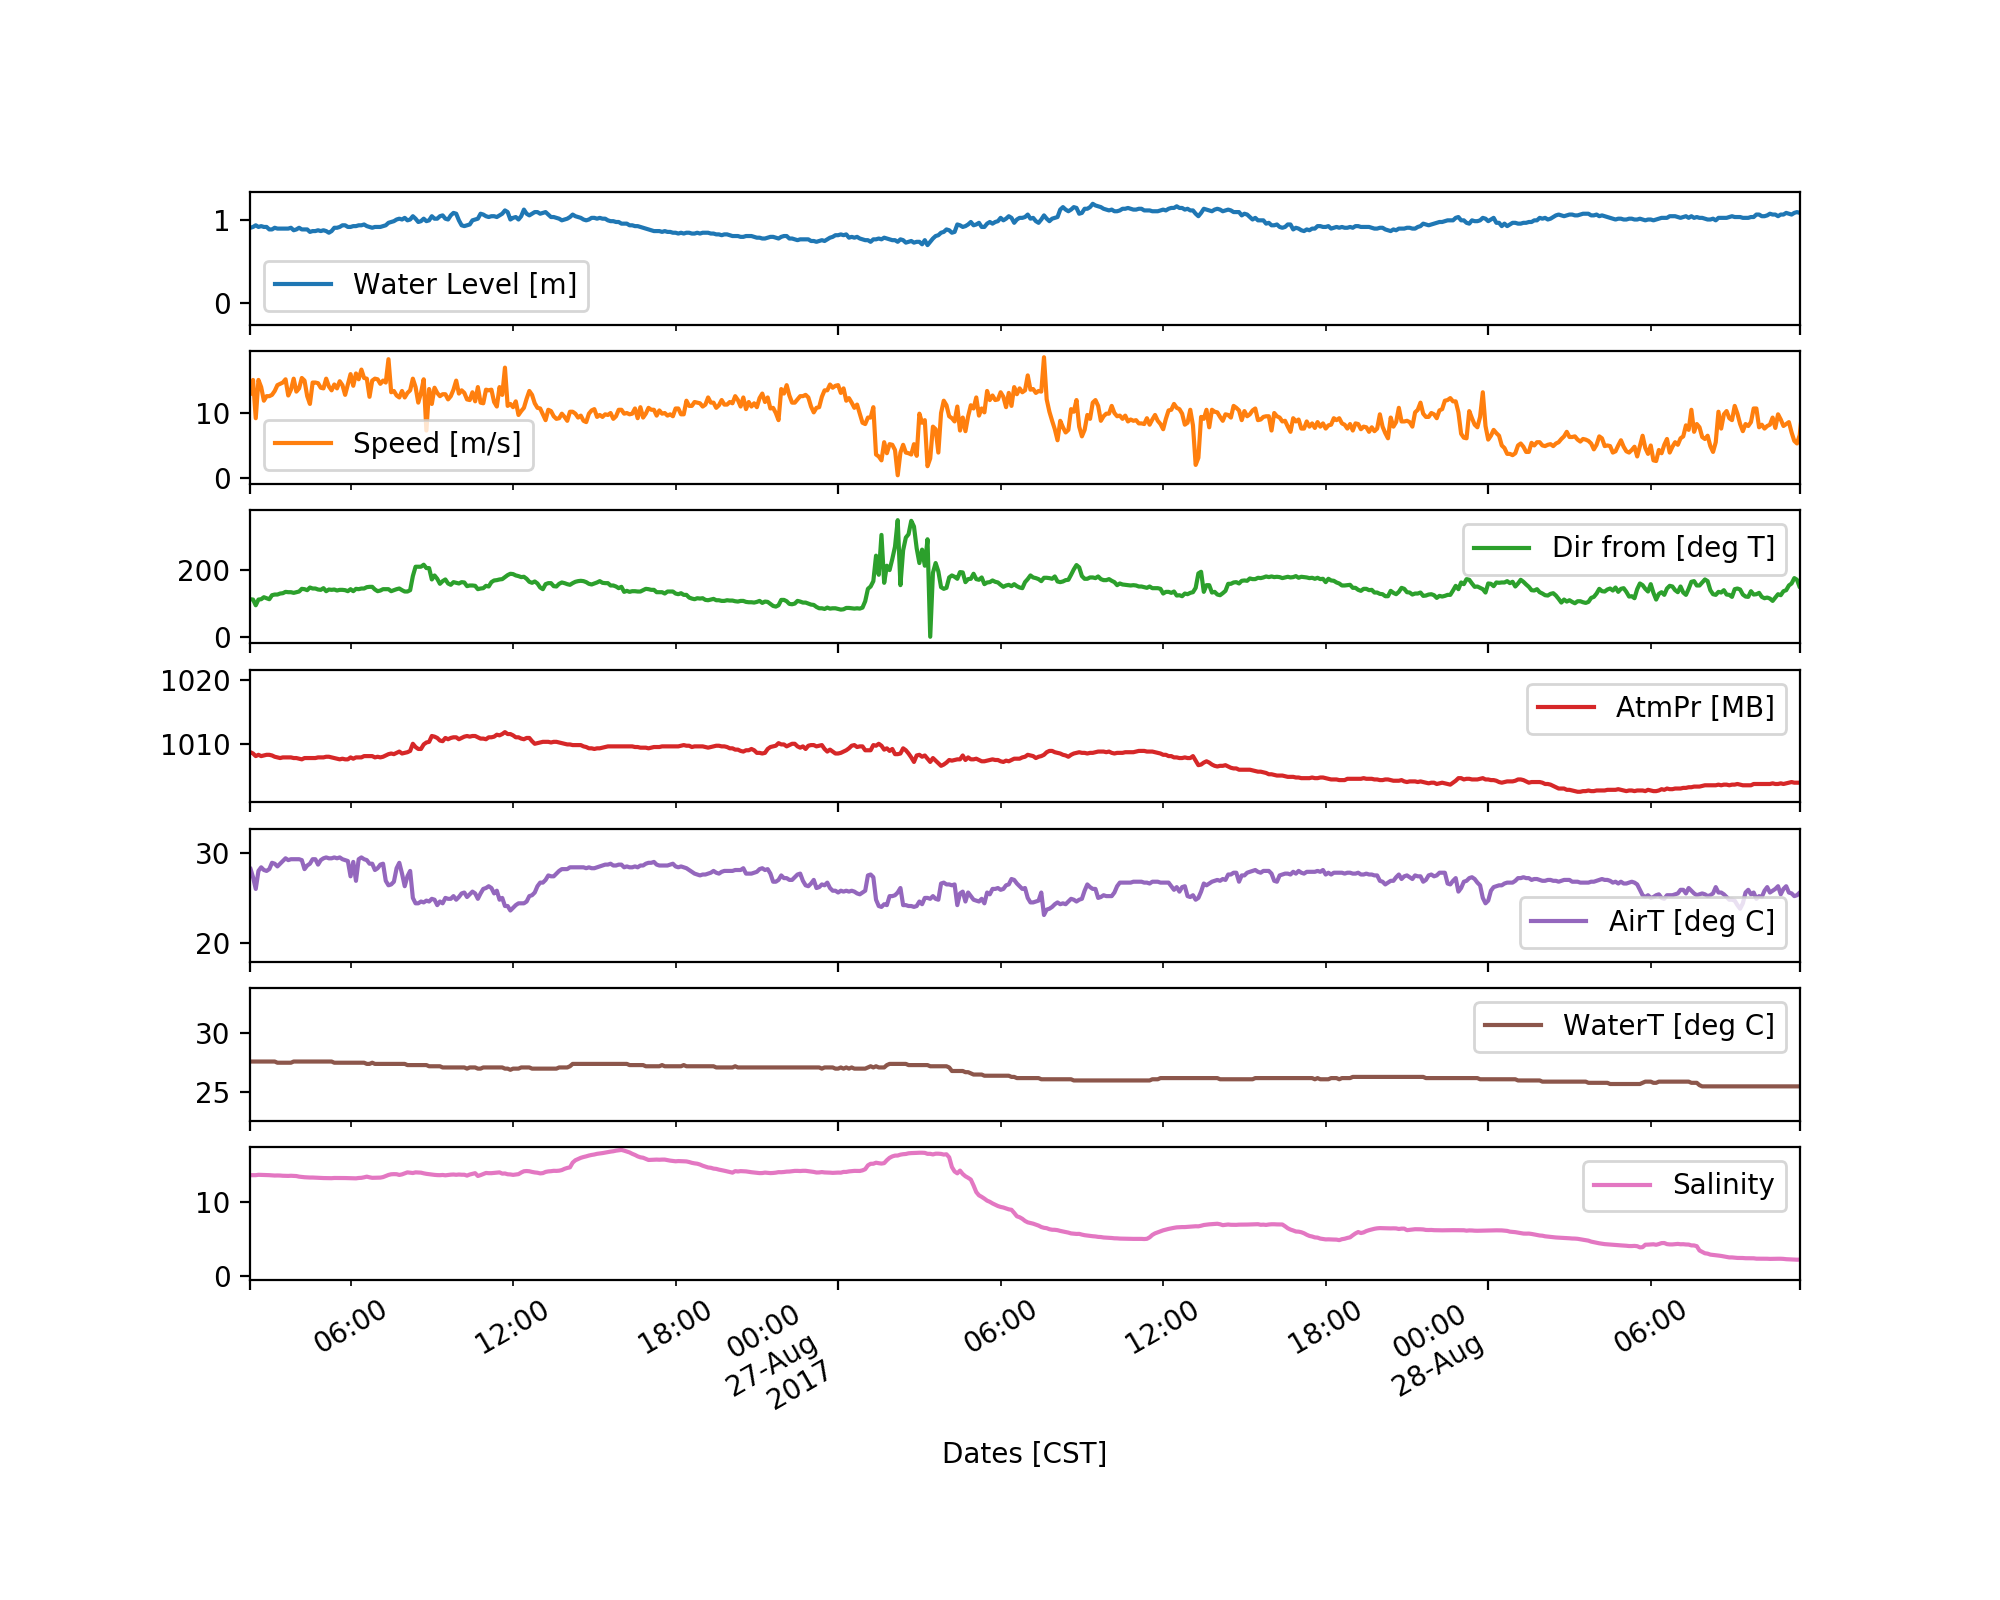

array([<matplotlib.axes._subplots.AxesSubplot object at 0x198850518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x19a4f38d0>], dtype=object)

In [60]:
cols = ['Water Level [m]', 'Speed [m/s]', 'Dir from [deg T]', 'AtmPr [MB]', 'AirT [deg C]', 'WaterT [deg C]', 'Salinity']
eagle[cols]['2017-08-20':'2017-9-30'].plot(subplots=True, figsize=(10, 8))

Math:
    
$\begin{align}
\partial V/\partial t &= V_{in} - V_{out} \\
\partial /\partial t \left(\int\int\int dxdydz\right) &= V_{in} - V_{out} \\
\Rightarrow V(t)_{in} &= V(t)_{out} + \partial /\partial t \left(\int\int\int dxdydz\right)
\end{align}$

Next steps:

1. Calculate $V(t)_{out}$ from the tidal current applied to the whole water column
 * Note that the tidal currents given at station g06010 are oriented along-channel with positive into the bay (flood) and negative out of the bay (ebb). So, I will need to use a negative sign in front of $V_{out}$ to account for that.
 * assume the velocity is the same for the whole water depth and across the whole channel, which isn't a terrible assumption, especially with depth since I have seen some plots of that.
 * then multiply by the cross-sectional area of the channel
1. Contour the sea surface elevation data across the bay in time
1. Get the depths
1. Calculate the above

### Calculate $V(t)_{out}$

In [63]:
tides = pd.read_table('buoys/g06010', parse_dates=True, index_col=0)

<IPython.core.display.Javascript object>


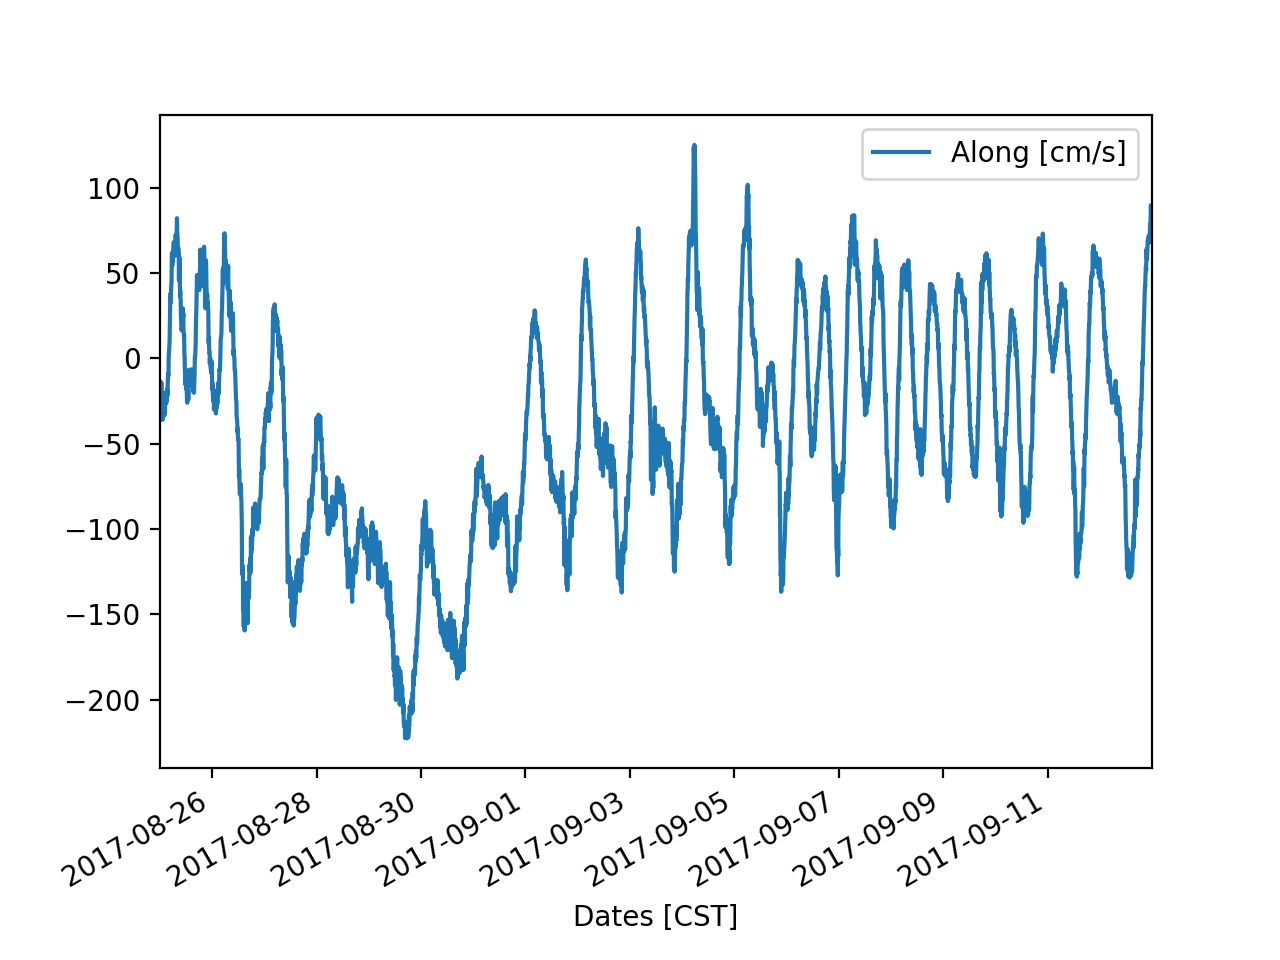

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a252e8>], dtype=object)

In [76]:
tides['2017-08-25':'2017-9-12'].plot(subplots=True, y='Along [cm/s]')

In [90]:
## read in bathymetry ##

# create arrays of lon/lat
num = 10261
dd = 9.2592589999999e-005
xllcorner = -95.250046296295
yllcorner = 28.849953716305
x = np.linspace(xllcorner, xllcorner+dd*num, num)
y = np.linspace(yllcorner, yllcorner+dd*num, num)
lon, lat = np.meshgrid(x, y)

# use every fifth bathymetry point
# bathymetry was decimated on hafen and scp'ed to here
bathy = np.load('Galveston_DEM_1072/bathy_every_fifth.npz')['bathy']
lon = lon[::5, ::5]
lat = lat[::5, ::5]



In [171]:
laea = cartopy.crs.LambertAzimuthalEqualArea()
pts = laea.transform_points(pc, lon, lat)
xp = pts[:,:,0]; yp  = pts[:,:,1]
dx = np.diff(xp[0,:]).mean()
dy = np.diff(yp[:,0]).mean()

# grid in projected space
X, Y = np.meshgrid(np.linspace(xp.min(), xp.max(), 100), np.linspace(yp.min(), yp.max(), 110))

In [8]:
box = [-94.787, -94.74, 29.34, 29.37]
# inds = np.where((lon>box[0]) * (lon< box[1]) * (lat>box[2]) * (lat<box[3]))
inds = (lon>box[0]) * (lon< box[1]) * (lat>box[2]) * (lat<box[3])

In [28]:
bathy[inds].shape

(6565,)

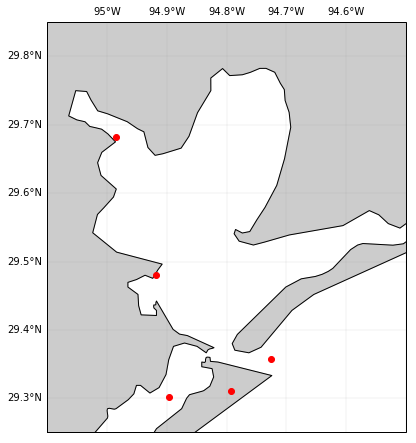

In [54]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
# rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)


fig = plt.figure(figsize=(8, 6))# (9.4, 7.7))
ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-95.1, -94.5, 29.25, 29.85], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'

for galv in galvs:
    ax.plot(bys[galv]['lon'], bys[galv]['lat'], 'ro', transform=pc)

# ax.contourf(lon, lat, bathy, transform=pc)

# ax.plot(bys['g06010']['lon'], bys['g06010']['lat'], 'ro', transform=pc)

### Contour sea surface elevation in time

In [87]:
# buoys in Galveston with SSH
# BOLI also has depth
galvs = ['8771486', '8770613', '8771013', '8771341', '8771450']

In [88]:
from matplotlib.dates import date2num

# gather sea surface data
key = 'Water Level [m]'
df_ssh = pd.DataFrame()
for galv in galvs:
    df_ssh[galv] = pd.read_table('buoys/' + galv, parse_dates=True, index_col=0, na_values=-999.0)[key].resample('30T', base=0).mean()
    
# # wind
# east, north = 'East [m/s]', 'North [m/s]'
# df_wind = pd.DataFrame()
# for galv in galvs:
#     df_wind[galv + east] = pd.read_table('buoys/' + galv, parse_dates=True, index_col=0, na_values=-999.0)[east].resample('30T', base=0).mean()
#     df_wind[galv + north] = pd.read_table('buoys/' + galv, parse_dates=True, index_col=0, na_values=-999.0)[north].resample('30T', base=0).mean() 
# df_wind['idx'] = date2num(pd.to_datetime(df_wind.index).to_pydatetime())

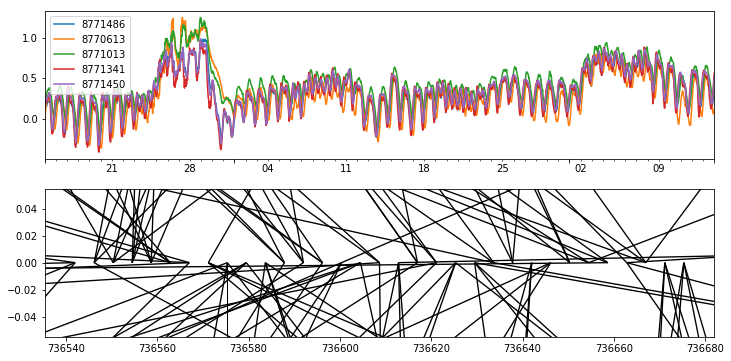

In [83]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))

df_ssh['2017-08-15':'2017-10-13'].plot(figsize=(12,6), ax=ax[0])

ddt = 200
width=.001
color='k'
for galv in galvs:
    ax[1].quiver(df_wind['idx'][::ddt], np.zeros(len(df_wind[::ddt])), df_wind[::ddt][galv + east], df_wind[::ddt][galv+north], headaxislength=0,
              headlength=0, width=width, units='y', scale_units='y', scale=1, color=color)


In [63]:
df1.columns

Index(['Water Level [m]', 'Speed [m/s]', 'Dir from [deg T]', 'Gust [m/s]',
       'AirT [deg C]', 'AtmPr [MB]', 'RelH [%]', 'East [m/s]', 'North [m/s]',
       'WaterT [deg C]', 'Conductivity [mS/cm]', 'Salinity'],
      dtype='object')

The Harvey behavior north in the bay is distinct from another storm in October:

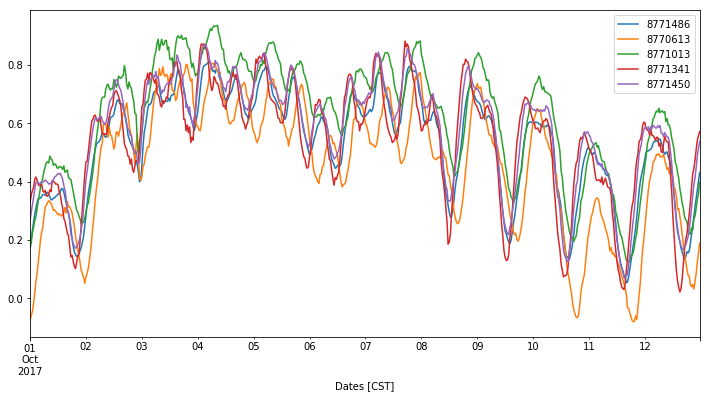

In [48]:
df_ssh['2017-10-1':'2017-10-12'].plot(figsize=(12,6))

In [92]:

# surface area of Galveston Bay (assume there aren't significant new tidal plains from flooding)
# also assuming that this data is just in Galveston Bay and not too far onto the shelf...
# is True where is water
water = bathy<0

In [125]:
(water*dx*dy).sum()/(1000**2)

4649.7883695863784

This says that the surface area of Galveston Bay is about 4700km$^2$.

In [141]:
import scipy

ll_nos = np.asarray([[bys[galv]['lon'], bys[galv]['lat']] for galv in galvs])




In [147]:
pts_nos = laea.transform_points(pc, ll_nos[:,0], ll_nos[:,1])[:,:2]


In [148]:
pts_nos

array([[-8155394.7332682 ,  4562923.2099175 ],
       [-8128632.22598639,  4619511.04749281],
       [-8141814.36127327,  4588753.19622789],
       [-8141454.97360354,  4564229.93822896],
       [-8149048.4351314 ,  4560228.96456388]])

In [160]:
date = df_ssh.index[0]
date

Timestamp('2017-08-01 00:00:00', freq='30T')

In [154]:
df_ssh.loc[date].values

array([ 0.18  , -0.0575,  0.1675,  0.335 ,  0.295 ])

In [172]:
xi = np.vstack((X.flat, Y.flat)).T

# for a single date
Zgrid = scipy.interpolate.griddata(pts_nos, df_ssh.loc[date].values, xi, method='linear', fill_value=np.nan)
# reconstitute the output to structured array so we can plot it with pcolormesh
Zgrid.shape = X.shape


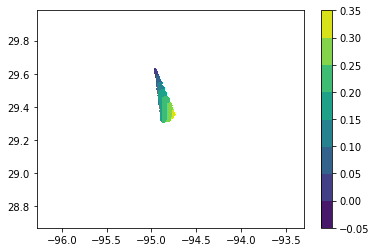

In [175]:
test = pc.transform_points(laea, X, Y)
lon_Zgrid = test[:,:,0]; lat_Zgrid = test[:,:,1] 
plt.contourf(lon_Zgrid, lat_Zgrid, Zgrid); plt.colorbar()

Or just do the 4700km$^2$ surface area times the sea surface height at 8771013.

In [176]:
V = 4700*df_ssh['8771013']

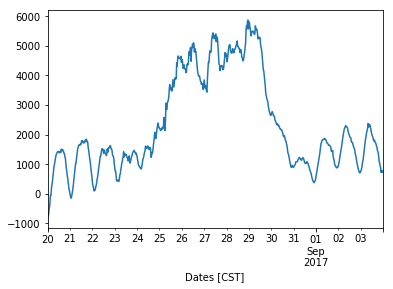

In [183]:
V['2017-08-20':'2017-9-3'].plot()

In [184]:
V.head(2)


Dates [CST]
2017-08-01 00:00:00    787.25
2017-08-01 00:30:00    874.20
Freq: 30T, Name: 8771013, dtype: float64

# Vout